In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from cycler import cycler

%matplotlib inline

In [146]:
coffee_colors = ['#f0e4cd', '#b28c5e', '#4f3828', '#2b2211']

In [195]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', coffee_colors),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': 'whitesmoke',
    'figure.facecolor': 'whitesmoke',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : True,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
    
})

In [2]:
df = pd.read_csv('arabica_data_cleaned.csv')

In [3]:
df.head()

,id_number,species,owner,country_of_origin,farm_name,lot_number,mill,ICO_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
df.dtypes

id_number                  int64
species                   object
owner                     object
country_of_origin         object
farm_name                 object
lot_number                object
mill                      object
ICO_number                object
company                   object
altitude                  object
region                    object
producer                  object
number_of_bags             int64
bag_weight                object
in_country_partner        object
harvest_year              object
grading_date              object
owner_1                   object
variety                   object
processing_method         object
aroma                    float64
flavor                   float64
aftertaste               float64
acidity                  float64
body                     float64
balance                  float64
uniformity               float64
clean_cup                float64
sweetness                float64
cupper_points            float64
total_cup_

In [5]:
df.drop(index=1310, inplace=True)

In [6]:
df.total_cup_points = df.total_cup_points * 10
df.total_cup_points = df.total_cup_points.astype(int)

In [7]:
df.aroma = df.aroma * 10
df.aroma = df.aroma.astype(int)

In [47]:
df.body = df.body * 10
df.body = df.body.astype(int)

In [8]:
df.flavor = df.flavor * 10
df.flavor = df.flavor.astype(int)

In [9]:
df.sweetness = df.sweetness * 10
df.sweetness = df.sweetness.astype(int)

In [10]:
df.acidity = df.acidity * 10
df.acidity = df.acidity.astype(int)

In [11]:
df.aftertaste = df.aftertaste * 10
df.aftertaste = df.aftertaste.astype(int)

In [34]:
df.moisture = df.moisture * 10
df.moisture = df.moisture.astype(int)

In [70]:
df.balance = df.balance * 10
df.balance = df.balance.astype(int)

In [71]:
df.uniformity = df.uniformity * 10
df.uniformity = df.uniformity.astype(int)

In [13]:
df[df.altitude_mean_meters.isnull() == False].altitude_mean_meters = df[df.altitude_mean_meters.isnull() == False].altitude_mean_meters * 10
df[df.altitude_mean_meters.isnull() == False].altitude_mean_meters = df[df.altitude_mean_meters.isnull() == False].altitude_mean_meters.astype(int)



/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(583,850,'On a 1,000 point scale, most coffees score in the 800s.')

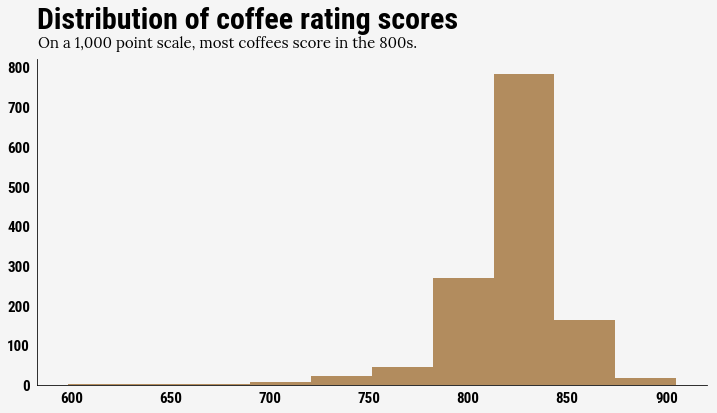

In [259]:
ax = df.total_cup_points.plot(kind='hist', figsize=(12,6), color='#b28c5e')
ax.set_ylabel('')

ax.set_title('Distribution of coffee rating scores', loc='left', pad=30)
ax.grid(False)
ax.text(583,850,'On a 1,000 point scale, most coffees score in the 800s.', size=15, fontdict={'family':'serif'})

[5.8351608]


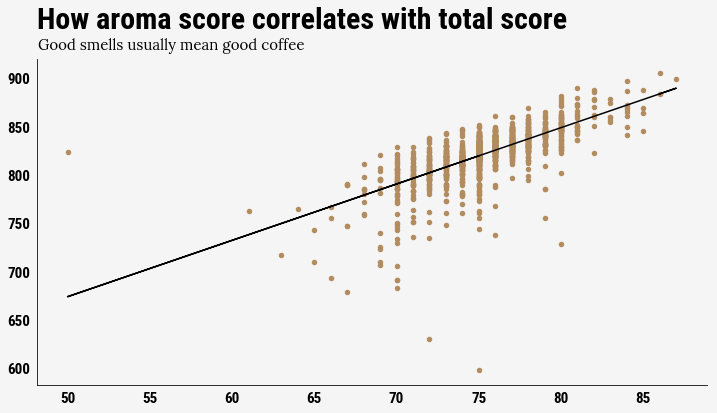

In [279]:
ax = df.plot(kind='scatter', x='aroma', y='total_cup_points', color='#b28c5e', figsize=(12,6))

x = df[['aroma']].values
y = df[['total_cup_points']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

plt.plot(df.aroma, m*df.aroma + b, '-', color='black')

plt.title('How aroma score correlates with total score', loc='left', pad=30)
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(False)
ax.text(48.2, 930,'Good smells usually mean good coffee', size=15, fontdict={'family':'serif'})

print(m)

[5.82477663]


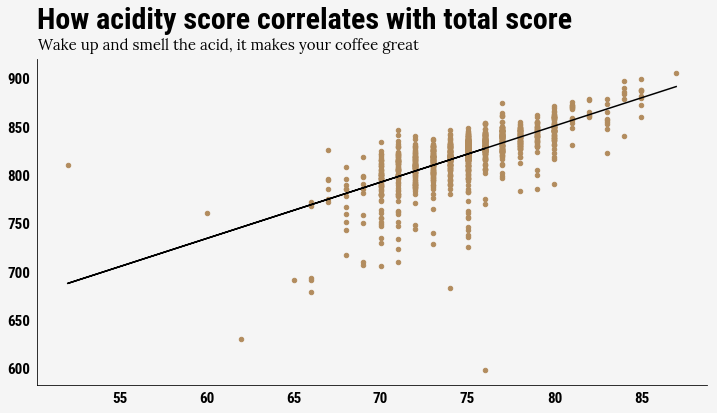

In [289]:
ax = df.plot(kind='scatter', x='acidity', y='total_cup_points',  color='#b28c5e', figsize=(12,6))

x = df[['acidity']].values
y = df[['total_cup_points']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

plt.plot(df.acidity, m*df.acidity + b, '-', color='black')

plt.title('How acidity score correlates with total score', loc='left', pad=30)
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(False)
ax.text(50.3, 930,'Wake up and smell the acid, it makes your coffee great', size=15, fontdict={'family':'serif'})

print(m)

[6.26628696]


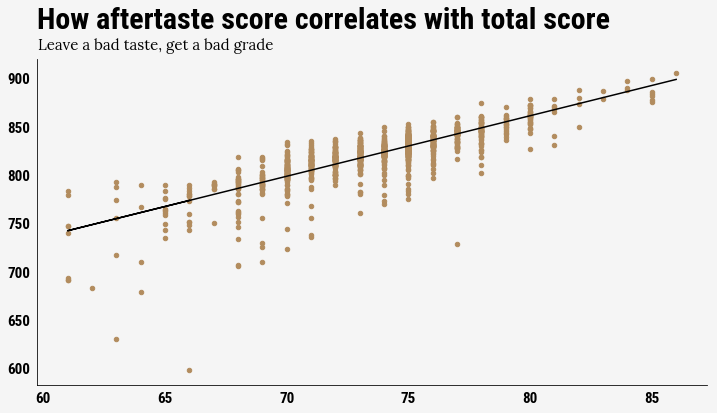

In [308]:
ax = df.plot(kind='scatter', x='aftertaste', y='total_cup_points', figsize=(12,6), color='#b28c5e')

x = df[['aftertaste']].values
y = df[['total_cup_points']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

plt.plot(df.aftertaste, m*df.aftertaste + b, '-', color='black')

plt.title('How aftertaste score correlates with total score', loc='left', pad=30)
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(False)
ax.text(59.8, 930,'Leave a bad taste, get a bad grade', size=15, fontdict={'family':'serif'})

print(m)

[0.00841785]


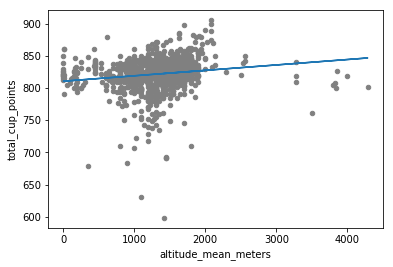

In [30]:
df[(df.altitude_mean_meters.isnull() == False) & (df.altitude_mean_meters < 10000)].plot(kind='scatter', x='altitude_mean_meters', y='total_cup_points', color='gray')

x = df[(df.altitude_mean_meters.isnull() == False) & (df.altitude_mean_meters < 10000)][['altitude_mean_meters']].values
y = df[(df.altitude_mean_meters.isnull() == False) & (df.altitude_mean_meters < 10000)][['total_cup_points']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

plt.plot(df[(df.altitude_mean_meters.isnull() == False) & (df.altitude_mean_meters < 10000)].altitude_mean_meters, m*df[(df.altitude_mean_meters.isnull() == False) & (df.altitude_mean_meters < 10000)].altitude_mean_meters + b, '-')

print(m)

[-0.84411252]


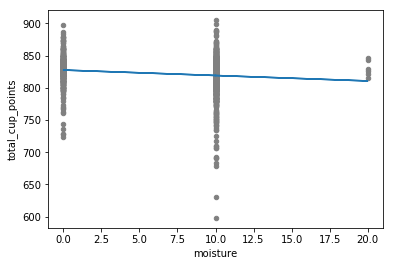

In [37]:
df.plot(kind='scatter', x='moisture', y='total_cup_points', color='gray')

x = df[['moisture']].values
y = df[['total_cup_points']].values

lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_

plt.plot(df.moisture, m*df.moisture + b, '-')

print(m)

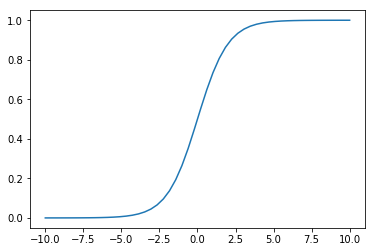

In [74]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

linear_range = np.linspace(-10,10)
plt.plot(linear_range, logistic(linear_range))

def plot_logistic_regression(x, y, lm):

    # plot original data
    plt.scatter(x=x,y=y)

    # Now plot the prediction of the fitted model
    predict_x = np.linspace(x.min(), x.max(), 10).reshape(-1, 1) # some evenly spaced points to predict
    predict_y = lm.predict_proba(predict_x)[:,1] #  probability of result = true
    plt.plot(predict_x, predict_y, '-', color='m')

[2.49342313]


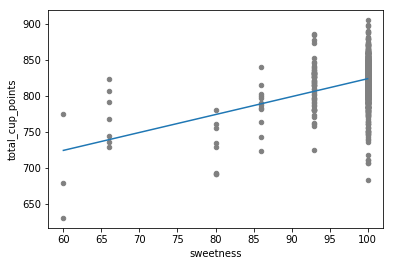

In [42]:
df[df.sweetness > 20].plot(kind='scatter', x='sweetness', y='total_cup_points', color='gray')

x = df[df.sweetness > 20][['sweetness']].values
y = df[df.sweetness > 20][['total_cup_points']].values 


lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_


plt.plot(df[df.sweetness > 20].sweetness, m*df[df.sweetness > 20].sweetness + b, '-')

print(m)

[5.89119427]


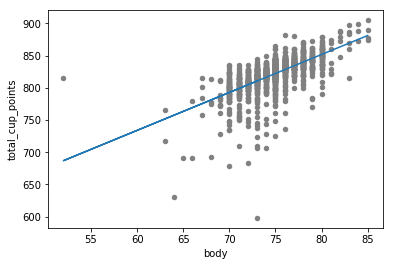

In [48]:
df.plot(kind='scatter', x='body', y='total_cup_points', color='gray')

x = df[['body']].values
y = df[['total_cup_points']].values 


lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_


plt.plot(df.body, m*df.body + b, '-')

print(m)

[5.91928073]


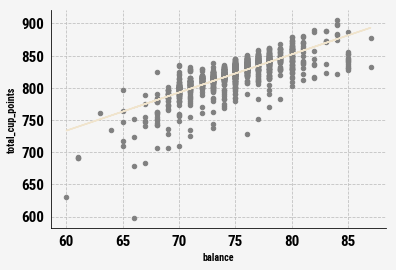

In [205]:
df.plot(kind='scatter', x='balance', y='total_cup_points', color='gray')

x = df[['balance']].values
y = df[['total_cup_points']].values 


lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_


plt.plot(df.balance, m*df.balance + b, '-')

print(m)

[2.77055092]


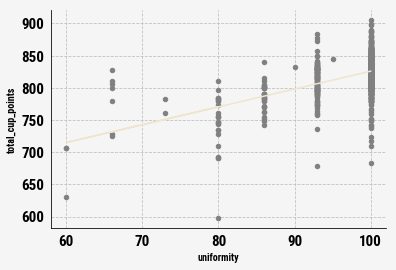

In [204]:
df.plot(kind='scatter', x='uniformity', y='total_cup_points', color='gray')

x = df[['uniformity']].values
y = df[['total_cup_points']].values 


lm = LinearRegression()
lm.fit(x,y)

m = lm.coef_[0]
b = lm.intercept_


plt.plot(df.uniformity, m*df.uniformity + b, '-')

print(m)

In [294]:
target_col = 'total_cup_points'
feature_cols = ['body', 'balance', 'uniformity', 'sweetness', 'aroma', 'aftertaste', 'acidity']

In [295]:
x = df[feature_cols].values
y = df[[target_col]].values

In [296]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
lm.coef_[0]

array([0.98209813, 1.5398749 , 1.42477258, 1.47460749, 1.46754743,
       2.32003767, 1.09033899])

In [298]:
correlation_df = pd.DataFrame(data=lm.coef_, columns=feature_cols, index=['score added per one point']).transpose().sort_values(by='score added per one point', ascending=False)

Text(0,1,'How coffee characteristics affect overall quality')

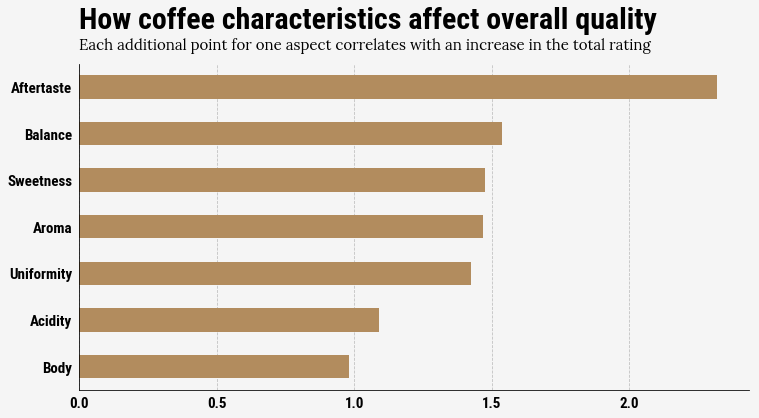

In [300]:
ax = pd.DataFrame(data=lm.coef_, columns=feature_cols, index=['score added per one point']).transpose().sort_values(by='score added per one point').plot(kind='barh', color='#b28c5e', figsize=(12,6))

ax.grid(axis='y')
ax.legend('')
ax.set_yticklabels(labels=[characteristic.title() for characteristic in pd.DataFrame(data=lm.coef_, columns=feature_cols, index=['score added per one point']).transpose().sort_values(by='score added per one point').index.values])

ax.text(0,6.8, 'Each additional point for one aspect correlates with an increase in the total rating', size=15, fontdict={'family':'serif'})

ax.set_title('How coffee characteristics affect overall quality', loc='left', pad=35)


In [113]:
pd.DataFrame?

In [221]:
ax.text?

In [187]:
pd.DataFrame(data=lm.coef_, columns=feature_cols, index=['score added per one point']).transpose().sort_values(by='score added per one point').index.values

array(['body', 'acidity', 'uniformity', 'aroma', 'sweetness', 'balance',
       'aftertaste'], dtype=object)